In [1]:
import numpy as np
import pandas as pd
import pickle
import json
import matplotlib as mpl
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm

# import from scripts
import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
from calculate_tau import fit_single_exp, fit_single_exp_2d, func_single_exp_monkey
from cfg_global import project_folder_path
os.chdir(current_wd)

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
# True - calc and plot, False only plot
calc_taus = False
save_taus = False
save_fig = False

In [4]:
dataset_folder = project_folder_path + 'results\\mice\\dataset\\'
fig_folder = project_folder_path + 'results\\mice\\fig_draft_paper\\'

### Load data (or calc)

In [ ]:
def calculate_acf_decline_flag(acf_, start_idx=1, end_idx=4):
    acf_decay = np.all(np.diff(acf_[start_idx:end_idx]) <= 0)
    return acf_decay

def get_trials_plot_df(trial_dict_, units_info_df_subset_, method_, n_trials_):
    unit_ids = []
    taus = []
    fit_r_squared = []
    decline_flags = []

    for unit_id, unit_data in trial_dict_.items():
        unit_ids.append(unit_id)
        taus.append(unit_data['taus'][0]['tau'])
        fit_r_squared.append(unit_data['taus'][0]['fit_r_squared'])
        decline_flags.append(calculate_acf_decline_flag(unit_data['acf'][0], start_idx=2, end_idx=4))

    trial_plot_df = pd.DataFrame({
        'unit_id': unit_ids,
        'tau': taus,
        'fit_r_squared': fit_r_squared,
        'decline_150_250': decline_flags,
        'method': method_,
        'n_trials': n_trials_
    })

    trial_plot_df['tau_ms'] = trial_plot_df['tau'] * 50
    trial_plot_df = trial_plot_df.merge(units_info_df_subset_, on='unit_id', how='left')

    n_rows_with_nan = trial_plot_df.isna().any(axis=1).sum()
    print(f'N rows with NaNs {n_rows_with_nan}')
    
    return trial_plot_df

In [ ]:
units_info_df = pd.read_pickle(dataset_folder + 'cut_30min\\lv_df.pkl')
units_info_df_subset = units_info_df[['unit_id', 'ecephys_structure_acronym', 'fr_hz_spont_30min', 'lv']].copy()
units_info_df_subset.head(2)

In [ ]:
# pearsontr_60_file = dataset_folder + 'cut_30min\\binned\\pearsonr_trial_avg_50ms_20lags_60trials_dict.pkl'
# pearsontr_trial_acf_60_dict = pd.read_pickle(pearsontr_60_file)
# pearsontr_60_df = get_trials_plot_df(pearsontr_trial_acf_60_dict, units_info_df_subset, 'pearsonr_trial_avg', 60)

In [ ]:
pearsontr_40_file = dataset_folder + 'cut_30min\\binned\\pearsonr_trial_avg_50ms_20lags_dict.pkl'
pearsontr_trial_acf_40_dict = pd.read_pickle(pearsontr_40_file)
pearsontr_40_df = get_trials_plot_df(pearsontr_trial_acf_40_dict, units_info_df_subset, 'pearsonr_trial_avg', 40)

pearsontr_60_file = dataset_folder + 'cut_30min\\binned\\pearsonr_trial_avg_50ms_20lags_60trials_dict.pkl'
pearsontr_trial_acf_60_dict = pd.read_pickle(pearsontr_60_file)
pearsontr_60_df = get_trials_plot_df(pearsontr_trial_acf_60_dict, units_info_df_subset, 'pearsonr_trial_avg', 60)

pearsontr_80_file = dataset_folder + 'cut_30min\\binned\\pearsonr_trial_avg_50ms_20lags_80trials_dict.pkl'
pearsontr_trial_acf_80_dict = pd.read_pickle(pearsontr_80_file)
pearsontr_80_df = get_trials_plot_df(pearsontr_trial_acf_80_dict, units_info_df_subset, 'pearsonr_trial_avg', 80)

pearsontr_100_file = dataset_folder + 'cut_30min\\binned\\pearsonr_trial_avg_50ms_20lags_100trials_dict.pkl'
pearsontr_trial_acf_100_dict = pd.read_pickle(pearsontr_100_file)
pearsontr_100_df = get_trials_plot_df(pearsontr_trial_acf_100_dict, units_info_df_subset, 'pearsonr_trial_avg', 100)

In [ ]:
isttc_40_file = dataset_folder + 'cut_30min\\non_binned\\sttc_trial_concat_50ms_20lags_dict.pkl'
isttc_acf_40_dict = pd.read_pickle(isttc_40_file)
isttc_40_df = get_trials_plot_df(isttc_acf_40_dict, units_info_df_subset, 'isttc_trial_concat', 40)

isttc_60_file = dataset_folder + 'cut_30min\\non_binned\\sttc_trial_concat_50ms_20lags_60trials_dict.pkl'
isttc_acf_60_dict = pd.read_pickle(isttc_60_file)
isttc_60_df = get_trials_plot_df(isttc_acf_60_dict, units_info_df_subset, 'isttc_trial_concat', 60)

isttc_80_file = dataset_folder + 'cut_30min\\non_binned\\sttc_trial_concat_50ms_20lags_80trials_dict.pkl'
isttc_acf_80_dict = pd.read_pickle(isttc_80_file)
isttc_80_df = get_trials_plot_df(isttc_acf_80_dict, units_info_df_subset, 'isttc_trial_concat', 80)

isttc_100_file = dataset_folder + 'cut_30min\\non_binned\\sttc_trial_concat_50ms_20lags_100trials_dict.pkl'
isttc_acf_100_dict = pd.read_pickle(isttc_100_file)
isttc_100_df = get_trials_plot_df(isttc_acf_100_dict, units_info_df_subset, 'isttc_trial_concat', 100)

In [ ]:
def remove_nans(pearson_df_, sttc_df_):
    # check for NaNs 
    
    rows_with_nans_acf_df = pearson_df_[pearson_df_.isna().any(axis=1)]
    n_rows_with_nan_acf = len(rows_with_nans_acf_df)
    print(f'N rows with NaNs {n_rows_with_nan_acf}')
    
    rows_with_nans_isttc_df = sttc_df_[sttc_df_.isna().any(axis=1)]
    n_rows_with_nan_isttc = len(rows_with_nans_isttc_df)
    print(f'N rows with NaNs {n_rows_with_nan_isttc}')
    
    # take from isttc dataset only rows where acf df has no NaNs
    sttc_df = sttc_df_[~sttc_df_['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]
    #sttc_df = sttc_df_
    pearson_df = pearson_df_[~pearson_df_['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]
    
    print(f'len acf_full_plot_df {len(pearson_df)}, len isttc_acf_df {len(sttc_df)}')

    return pearson_df, sttc_df

In [ ]:
pearsontr_trial_acf_40_df, isttc_acf_40_df = remove_nans(pearsontr_trial_acf_40_df, isttc_acf_40_df)
pearsontr_trial_acf_60_df, isttc_acf_60_df = remove_nans(pearsontr_trial_acf_60_df, isttc_acf_60_df)
pearsontr_trial_acf_80_df, isttc_acf_80_df = remove_nans(pearsontr_trial_acf_80_df, isttc_acf_80_df)
pearsontr_trial_acf_100_df, isttc_acf_100_df = remove_nans(pearsontr_trial_acf_100_df, isttc_acf_100_df)
pearsontr_trial_acf_150_df, isttc_acf_150_df = remove_nans(pearsontr_trial_acf_150_df, isttc_acf_150_df)
pearsontr_trial_acf_200_df, isttc_acf_200_df = remove_nans(pearsontr_trial_acf_200_df, isttc_acf_200_df)

In [ ]:
# acf_full_df_file = dataset_folder + 'cut_30min\\binned\\acf_full_50ms_20lags_df.pkl'
# acf_full_df = pd.read_pickle(acf_full_df_file)
# acf_isttc_full_df_file = dataset_folder + 'cut_30min\\non_binned\\acf_isttc_full_50ms_20lags_df_25dt.pkl'
# acf_isttc_full_df = pd.read_pickle(acf_isttc_full_df_file)

def unit_taus(acf_full_df_file_):
    n_lags = 20
    acf_cols = ['acf_' + str(i) for i in range(n_lags+1)]
    print('acf_cols {}'.format(acf_cols))
    
    acf_full_df = pd.read_pickle(acf_full_df_file_)
    
    acf_full_2d = acf_full_df[acf_cols].values
    print(f'acf_2d shape {acf_full_2d.shape}')
    acf_full_unit_ids = acf_full_df['unit_id'].values
    print(f'acf_full_unit_ids shape {acf_full_unit_ids.shape}')
    
    acf_full_dict = {}
    for unit_id_idx, unit_id in enumerate(acf_full_unit_ids):
        if unit_id_idx % 1000 == 0:
            print(f'#####\nProcessing unit {unit_id}, {unit_id_idx+1}/{len(acf_full_unit_ids)}, {datetime.now()}')
        fit_popt, fit_pcov, tau, tau_ci, fit_r_squared, explained_var, log_message = fit_single_exp(acf_full_2d[unit_id_idx,:],
                                                                                  start_idx_=1, exp_fun_=func_single_exp_monkey)
        taus = {'tau':tau,
                'tau_lower':tau_ci[0],
                'tau_upper':tau_ci[1],
                'fit_r_squared': fit_r_squared,
                'explained_var': explained_var,
                'popt': fit_popt,
                'pcov': fit_pcov,
                'log_message': log_message}
        acf_full_dict[unit_id] = {'taus': taus,
                                  'acf': acf_full_2d[unit_id_idx,:]}
    return acf_full_dict

acf_full_dict_30 = unit_taus(dataset_folder + 'cut_30min\\binned\\acf_full_50ms_20lags_df.pkl')
isttc_full_dict_30 = unit_taus(dataset_folder + 'cut_30min\\non_binned\\acf_isttc_full_50ms_20lags_df_25dt.pkl')


def calculate_acf_decline_flag(acf_, start_idx=3, end_idx=5):
    acf_decay = np.all(np.diff(acf_[start_idx:end_idx]) <= 0)
    return acf_decay

def make_plot_df(acf_full_dict, method, length):
    data = []
    for unit_id, unit_data in acf_full_dict.items():
        taus = unit_data['taus']  
        data.append({
            'unit_id': unit_id,
            'tau': taus['tau'],
            # 'tau_lower': taus['tau_lower'],
            # 'tau_upper': taus['tau_upper'],
            'fit_r_squared': taus['fit_r_squared'],
            'decline_150_250': calculate_acf_decline_flag(unit_data['acf'], start_idx=2, end_idx=4)
        })
    acf_full_plot_df = pd.DataFrame(data)
    acf_full_plot_df['method'] = method
    acf_full_plot_df['length'] = length
    acf_full_plot_df['tau_ms'] = acf_full_plot_df['tau'] * 50
    acf_full_plot_df = acf_full_plot_df.merge(units_info_df_subset, on='unit_id', how='left')
    
    rows_with_nans_df = acf_full_plot_df[acf_full_plot_df.isna().any(axis=1)]
    n_rows_with_nan = len(rows_with_nans_df)
    print(f'N rows with NaNs {n_rows_with_nan}')

    return acf_full_plot_df

acf_30_plot = make_plot_df(acf_full_dict_30, 'acf_full', 30)
sttc_30_plot = make_plot_df(isttc_full_dict_30, 'sttc_full', 30)

In [ ]:
pearsontr_40_df['tau_diff_rel'] = np.abs(pearsontr_40_df['tau_ms'] - acf_30_plot['tau_ms']) / acf_30_plot['tau_ms'] * 100
pearsontr_40_df['tau_diff_rel_log10'] = np.log10(pearsontr_40_df['tau_diff_rel'])

pearsontr_60_df['tau_diff_rel'] = np.abs(pearsontr_60_df['tau_ms'] - acf_30_plot['tau_ms']) / acf_30_plot['tau_ms'] * 100
pearsontr_60_df['tau_diff_rel_log10'] = np.log10(pearsontr_60_df['tau_diff_rel'])

pearsontr_80_df['tau_diff_rel'] = np.abs(pearsontr_80_df['tau_ms'] - acf_30_plot['tau_ms']) / acf_30_plot['tau_ms'] * 100
pearsontr_80_df['tau_diff_rel_log10'] = np.log10(pearsontr_80_df['tau_diff_rel'])

pearsontr_100_df['tau_diff_rel'] = np.abs(pearsontr_100_df['tau_ms'] - acf_30_plot['tau_ms']) / acf_30_plot['tau_ms'] * 100
pearsontr_100_df['tau_diff_rel_log10'] = np.log10(pearsontr_40_df['tau_diff_rel'])

In [ ]:
isttc_40_df['tau_diff_rel'] = np.abs(isttc_40_df['tau_ms'] - acf_30_plot['tau_ms']) / acf_30_plot['tau_ms'] * 100
isttc_40_df['tau_diff_rel_log10'] = np.log10(isttc_40_df['tau_diff_rel'])

isttc_60_df['tau_diff_rel'] = np.abs(isttc_60_df['tau_ms'] - sttc_30_plot['tau_ms']) / sttc_30_plot['tau_ms'] * 100
isttc_60_df['tau_diff_rel_log10'] = np.log10(isttc_60_df['tau_diff_rel'])

isttc_80_df['tau_diff_rel'] = np.abs(isttc_80_df['tau_ms'] - sttc_30_plot['tau_ms']) / sttc_30_plot['tau_ms'] * 100
isttc_80_df['tau_diff_rel_log10'] = np.log10(isttc_80_df['tau_diff_rel'])

isttc_100_df['tau_diff_rel'] = np.abs(isttc_100_df['tau_ms'] - sttc_30_plot['tau_ms']) / sttc_30_plot['tau_ms'] * 100
isttc_100_df['tau_diff_rel_log10'] = np.log10(isttc_40_df['tau_diff_rel'])

In [ ]:
tau_df = pd.concat([pearsontr_40_df, isttc_40_df, pearsontr_60_df, isttc_60_df, 
                    pearsontr_80_df, isttc_80_df, pearsontr_100_df, isttc_100_df])

tau_df.reset_index(inplace=True, drop=True)

tau_df

In [ ]:
# Step 1: Drop rows where tau_ms is NaN
df_clean = tau_df.dropna(subset=['tau_ms'])
#df_clean = df_clean[df_clean['fit_r_squared'] > 0]
#df_clean = df_clean[df_clean['tau_ms'] < 1000]

# Step 2: Count unique method × n_trials combos per unit_id
required_combos = df_clean.groupby(['method', 'n_trials']).ngroups

# Step 3: Count actual valid combos per unit_id
valid_units = (
    df_clean
    .groupby('unit_id')
    .agg(n_combos=('tau_ms', lambda x: x.count()),
         unique_combos=('tau_ms', lambda x: x.groupby([df_clean.loc[x.index, 'method'], 
                                                        df_clean.loc[x.index, 'n_trials']]).ngroups))
    .reset_index()
)

# Step 4: Keep only unit_ids with all required combinations
complete_units = valid_units[
    valid_units['unique_combos'] == required_combos
]['unit_id']

# Step 5: Filter the original df
df_filtered = df_clean[df_clean['unit_id'].isin(complete_units)]

In [ ]:
df_filtered.groupby(by=['method', 'n_trials'], as_index=False).count()

In [ ]:
df_filtered.to_csv(dataset_folder + 'tau_unit_long_2_methods_var_trials_df.csv')
df_filtered.to_pickle(dataset_folder + 'tau_unit_long_2_methods_var_trials_df.pkl')

In [ ]:
df_filtered.groupby(by=['method', 'n_trials'], as_index=False)['tau_diff_rel'].describe()

In [ ]:
# if save_taus:
#     class NumpyEncoder(json.JSONEncoder):
#         def default(self, obj):
#             if isinstance(obj, np.ndarray):
#                 return obj.tolist()  # Convert ndarray to list
#             return super().default(obj)
    
#     with open(dataset_folder + 'area_taus_dict.json', 'w') as f:
#         json.dump(area_taus_dict, f, cls=NumpyEncoder, indent=4)  

In [ ]:
# with open(dataset_folder + 'area_taus_dict.json', 'r') as f:
#     area_taus_dict = json.load(f)

### Plots

In [5]:
df_filtered = pd.read_pickle(dataset_folder + 'tau_unit_long_2_methods_var_trials_df.pkl')

In [10]:
df_filtered

,unit_id,tau,fit_r_squared,decline_150_250,method,n_trials,tau_ms,ecephys_structure_acronym,fr_hz_spont_30min,lv,tau_diff_rel,tau_diff_rel_log10
0,950913540,0.849050,3.352365e-01,True,pearsonr_trial_avg,40,4.245252e+01,VISam,6.038333,1.239003,4.630765e+01,1.665653
1,950915005,0.008316,-2.220446e-16,False,pearsonr_trial_avg,40,4.158075e-01,VISam,4.030556,0.628989,7.568446e+01,1.879007
2,950915018,0.037434,-3.997691e-12,False,pearsonr_trial_avg,40,1.871692e+00,VISam,1.903333,0.557600,3.996392e-02,-1.398332
4,950915049,26976.692741,3.231913e-01,False,pearsonr_trial_avg,40,1.348835e+06,VISam,0.953889,1.125211,1.077059e+08,8.032240
5,950913944,6.050519,7.411467e-01,True,pearsonr_trial_avg,40,3.025260e+02,VISam,10.051111,0.712415,1.222143e+01,1.087122
...,...,...,...,...,...,...,...,...,...,...,...,...
46192,951190495,6.511238,6.891404e-01,False,isttc_trial_concat,100,3.255619e+02,VISrl,2.706667,0.972210,6.696302e+01,1.934614
46193,951190514,0.030130,-4.911167e-10,False,isttc_trial_concat,100,1.506519e+00,VISrl,7.075556,1.342258,2.831707e+01,-0.007444
46194,951190512,0.030855,-1.952301e-10,False,isttc_trial_concat,100,1.542770e+00,VISrl,1.458889,0.950149,9.573990e+00,2.125797
46195,951190507,78726.424176,7.406914e-01,False,isttc_trial_concat,100,3.936321e+06,VISrl,2.644444,0.795264,3.045397e+05,3.143787


In [11]:
df_filtered.groupby(by=['method', 'n_trials'], as_index=False).count()

,method,n_trials,unit_id,tau,fit_r_squared,decline_150_250,tau_ms,ecephys_structure_acronym,fr_hz_spont_30min,lv,tau_diff_rel,tau_diff_rel_log10
0,isttc_trial_concat,40,4588,4588,4588,4588,4588,4588,4588,4588,4588,4588
1,isttc_trial_concat,60,4588,4588,4588,4588,4588,4588,4588,4588,4588,4588
2,isttc_trial_concat,80,4588,4588,4588,4588,4588,4588,4588,4588,4588,4588
3,isttc_trial_concat,100,4588,4588,4588,4588,4588,4588,4588,4588,4588,4588
4,pearsonr_trial_avg,40,4588,4588,4588,4588,4588,4588,4588,4588,4588,4588
5,pearsonr_trial_avg,60,4588,4588,4588,4588,4588,4588,4588,4588,4588,4588
6,pearsonr_trial_avg,80,4588,4588,4588,4588,4588,4588,4588,4588,4588,4588
7,pearsonr_trial_avg,100,4588,4588,4588,4588,4588,4588,4588,4588,4588,4588


In [6]:
color_pearson_trail_avg = '#f4a91c' 
color_sttc_trail_concat = '#955da2' 

colors = [color_pearson_trail_avg, color_sttc_trail_concat]


In [ ]:
fig, axes = plt.subplots(1,1, figsize=(5, 3), sharey=False)

sns.regplot(x='n_trials', y='tau_diff_rel_log10', data = df_filtered.query('method == "pearsonr_trial_avg"').copy(),
            scatter=None, ax=axes, label='pearsonr', color=color_pearson_trail_avg)
sns.regplot(x='n_trials', y='tau_diff_rel_log10', data = df_filtered.query('method == "isttc_trial_concat"').copy(),
            scatter=None, ax=axes, label='isttc_concat', color=color_sttc_trail_concat)

axes.legend(frameon=False)
axes.set_xlabel('Signal lenght (min)')

# for ax in axes.flat:
#     ax.set_ylabel('Log10 diff(IT, \nground truth) (ms)')

sns.despine()

In [ ]:
df_filtered

In [7]:
# intervals for error plots
intervals = {
    '+-100':   (0,   100),
    '+-75':  (0,  75),
    '+-50':  (0,  50),
    '+-25':  (0,  25),
}

tau_3methods_df = df_filtered[['unit_id', 'method', 'n_trials', 'tau_ms', 
       'tau_diff_rel', 'tau_diff_rel_log10']].copy()
tau_3methods_df.reset_index(inplace=True, drop=True)

df = tau_3methods_df.copy()
rows = []
for method, sub in df.groupby(by=['method','n_trials']):
    total = len(sub)
    row = {'method': method}
    for name, (lo, hi) in intervals.items():
        cnt = sub['tau_diff_rel'].between(lo, hi).sum()
        row[name] = cnt/total*100
    rows.append(row)
tau_3methods_error_df = pd.DataFrame(rows).set_index('method')

# make long df
tau_3methods_error_df = tau_3methods_error_df.reset_index()
tau_3methods_error_long_df = tau_3methods_error_df.melt(
    id_vars='method',
    var_name='interval',
    value_name='percentage'
)

tau_3methods_error_long_df[['method','n_trials']] = pd.DataFrame(
    tau_3methods_error_long_df['method'].tolist(),
    index=tau_3methods_error_long_df.index
)
tau_3methods_error_long_df = tau_3methods_error_long_df.rename(columns={'interval':'error_interval'})
tau_3methods_error_long_df = tau_3methods_error_long_df[['method','n_trials','error_interval','percentage']]

In [8]:
# prep for heatmaps
# ACF
pearsonr_trial_avg = tau_3methods_error_long_df[
    tau_3methods_error_long_df['method']=='pearsonr_trial_avg'
]
pearsonr_trial_avg_pivot = pearsonr_trial_avg.pivot(
    index='n_trials',
    columns='error_interval',
    values='percentage'
)

# ISTTC
sttc_trial_concat = tau_3methods_error_long_df[
    tau_3methods_error_long_df['method']=='isttc_trial_concat'
]
sttc_trial_concat_pivot = sttc_trial_concat.pivot(
    index='n_trials',
    columns='error_interval',
    values='percentage'
)

diff_pivot_pearsonr_concat = pearsonr_trial_avg_pivot - sttc_trial_concat_pivot 

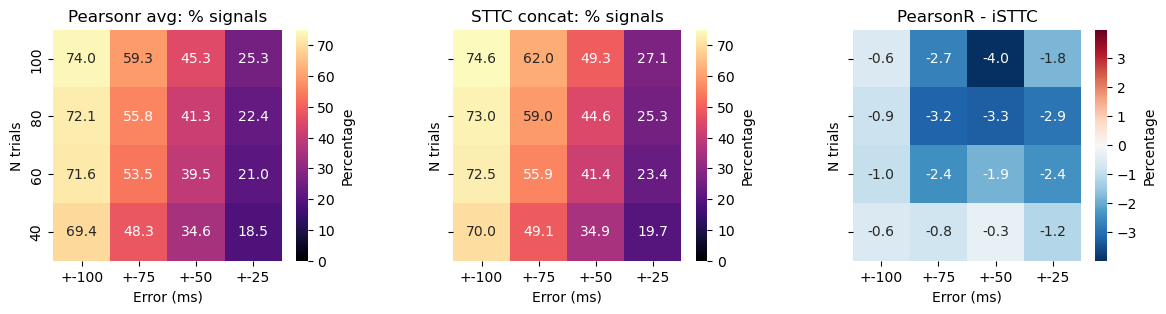

In [9]:
col_order = ['+-100', '+-75', '+-50', '+-25']

row_order = sorted(diff_pivot_pearsonr_concat.index, reverse=True)

pearsonr_trial_avg_ordered  = pearsonr_trial_avg_pivot.reindex(index=row_order, columns=col_order)
sttc_trial_concat_ordered  = sttc_trial_concat_pivot.reindex(index=row_order, columns=col_order)
diff_pivot_pearsonr_concat_pivot_ordered  = diff_pivot_pearsonr_concat.reindex(index=row_order, columns=col_order)

# plot ACF heatmap
fig, axes = plt.subplots(1, 3, figsize=(14, 3), sharey=True)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

diff_limit = np.max([np.abs(diff_pivot_pearsonr_concat_pivot_ordered.min().min()), 
                     np.abs(diff_pivot_pearsonr_concat_pivot_ordered.max().max())])

norm = TwoSlopeNorm(vcenter=0, vmin=-diff_limit, vmax=diff_limit)
#norm = TwoSlopeNorm(vcenter=0)

sns.heatmap(
    pearsonr_trial_avg_ordered,
    cmap="magma", vmin=0, vmax=75,
    cbar_kws={'label': 'Percentage'}, 
    annot=True, fmt=".1f",
    ax=axes[0]
)
axes[0].set_title("Pearsonr avg: % signals")

sns.heatmap(
    sttc_trial_concat_ordered,
    cmap="magma", vmin=0, vmax=75,
    cbar_kws={'label': 'Percentage'}, 
    annot=True, fmt=".1f",
    ax=axes[1]
)
axes[1].set_title('STTC concat: % signals')

sns.heatmap(
    diff_pivot_pearsonr_concat_pivot_ordered,
    cmap="RdBu_r", 
    norm=norm,
    cbar_kws={'label': 'Percentage'}, 
    annot=True, fmt=".1f",
    ax=axes[2]
)
axes[2].set_title('PearsonR - iSTTC')

for ax in axes.flat:
    ax.set_xlabel('Error (ms)')
    ax.set_ylabel('N trials')

save_fig = True
if save_fig:
    plt.savefig(fig_folder + 'taus_n_trial_var_p_vs_concat_parametric_heatmaps.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_n_trial_var_p_vs_concat_parametric_heatmaps.svg' , bbox_inches='tight')